<a href="https://colab.research.google.com/github/sangita-mitra/Movie-Recommendation-and-Analysis/blob/main/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement


---


Perform analysis on IMDB movie dataset and provide basic recommendations based on similar genres and movies which users prefer. Some key points to focus:

*   Profitability of movies
*   Social media popularity analysis
*   Language based gross analysis
*   Comparison of gross and profit for different genres
*   Actor performance analysis
*   Recommendation systems based on actors, movies, genres


**Importing libraries**

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

from IPython.display import display

plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

**Import and Read Dataset**

In [167]:
data = pd.read_csv('movie_metadata.csv')

In [168]:
data.shape

(5043, 28)

The dataset has 5043 rows and 28 columns.

In [169]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [171]:
# remove unnecassary columns from the dataset

data = data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      ], 
                       axis = 1)


In [172]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [173]:
data.shape

(5043, 16)

**Impute Missing Values**

In [174]:
# calculate percentage of missing values for each columns

round(100*(data.isnull().sum()/len(data.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [175]:
# Since 'gross' and 'budget' columns have large number of NaN values, drop all the rows with NaNs at this column using the 'isnan' function of NumPy alongwith a negation '~'

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [176]:
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [177]:
# using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

# using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)

# using "Unknown Actor" for imputing the missing values of actor names

data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

data.isnull().sum().sum()

0

No missing values in the dataframe.

**Feature Engineering**

In [178]:
#convert the gross and budget from $ to Million $ to make the analysis easier

data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [179]:
#Calculate Profit column using the Budget and Gross

data['Profit'] = data['gross'] - data['budget']

## Top 10 most profitable movies

In [180]:
data[['movie_title', 'Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
794,The Avengers,403.279547
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061


In [181]:
#there are some duplicate rows in the data. Remove all the duplicates from data.By looking at the above result we can easily analyze that there are some duplicate

data.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [182]:
#check the Top 10 Profitable Movies Again

data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


Avatar is the highest profitable movie with Jurrasic World and Titanic second and third highest profit.

## Categorize movies based on languages

In [183]:
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Hebrew           3
Danish           3
Thai             3
Persian          3
Dutch            3
Indonesian       2
Aboriginal       2
Dari             2
Swedish          1
Filipino         1
Mongolian        1
Czech            1
Vietnamese       1
Icelandic        1
Kazakh           1
Bosnian          1
Telugu           1
Arabic           1
Russian          1
Maya             1
None             1
Dzongkha         1
Romanian         1
Hungarian        1
Zulu             1
Aramaic          1
Name: language, dtype: int64

More than 3,600 movies are English and some of the movies are from French, Spanish and so on. So we can categorize all the other movies as Foreign.

In [184]:
#categorizes movies into English and Foreign

def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'

data['language'] = data['language'].apply(language)

data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

## Categorizes movies based on duration

In [185]:
#categorize the movies in two part- short and long (more than 2 hr) based on duration.

def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
data['duration'] = data['duration'].apply(duration)

data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

## Genres Analysis

In [186]:
data['genres'].value_counts()

Drama                                                               153
Comedy|Drama|Romance                                                151
Comedy|Drama                                                        147
Comedy                                                              145
Comedy|Romance                                                      135
Drama|Romance                                                       119
Crime|Drama|Thriller                                                 82
Action|Crime|Thriller                                                55
Action|Crime|Drama|Thriller                                          50
Action|Adventure|Sci-Fi                                              46
Action|Adventure|Thriller                                            45
Comedy|Crime                                                         45
Horror                                                               43
Drama|Thriller                                                  

In [187]:
#most of the movies have multiple genres, so lets keep at most four genres using.

data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


**Data Visualization**

## Social Media Popularity

In [188]:
#calculate socila media popularity of a movie by aggregating No. of voted users, No. of Users for Reviews, and Facebook Likes.

data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes']

## Top 10 Most Popular Movies on Social media

In [189]:
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


Batman v Superman: Dawn of Justice is the most popular movie on social media.

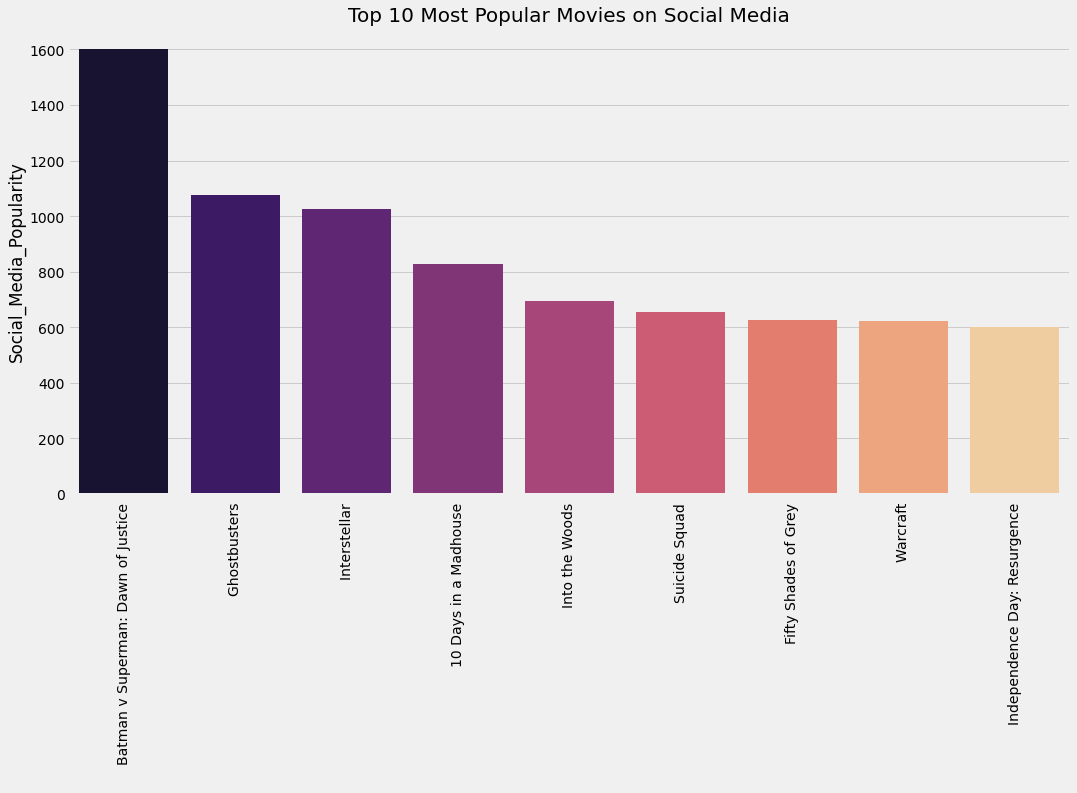

In [190]:
sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

## Comparison of Gross and Profit for Different Genres

In [191]:
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

In [192]:
print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','Profit']].style.background_gradient(cmap = 'spring'))

The Most Profitable Movie from each Genre


,Genre1,movie_title,Profit
0,Action,Avatar,523.505847
509,Adventure,The Lion King,377.783777
521,Animation,Despicable Me 2,292.049635
1403,Biography,The Blind Side,226.950375
836,Comedy,Forrest Gump,274.691196
3466,Crime,The Godfather,128.821952
3583,Documentary,Fahrenheit 9/11,113.078393
26,Drama,Titanic,458.672302
3080,Family,E.T. the Extra-Terrestrial,424.449459
2485,Fantasy,The Others,79.471845


Action, Drama, and Family are three most pofitable genres.

## Language based profit analysis

In [193]:
# lets convert year into integer
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language','title_year']).agg('sum').sort_values(by = 'Profit',ascending = False)
                                                          .head(10).style.background_gradient(cmap = 'Oranges'))


Most Profitable Years in Box Office


English movies are most profitable movies. 

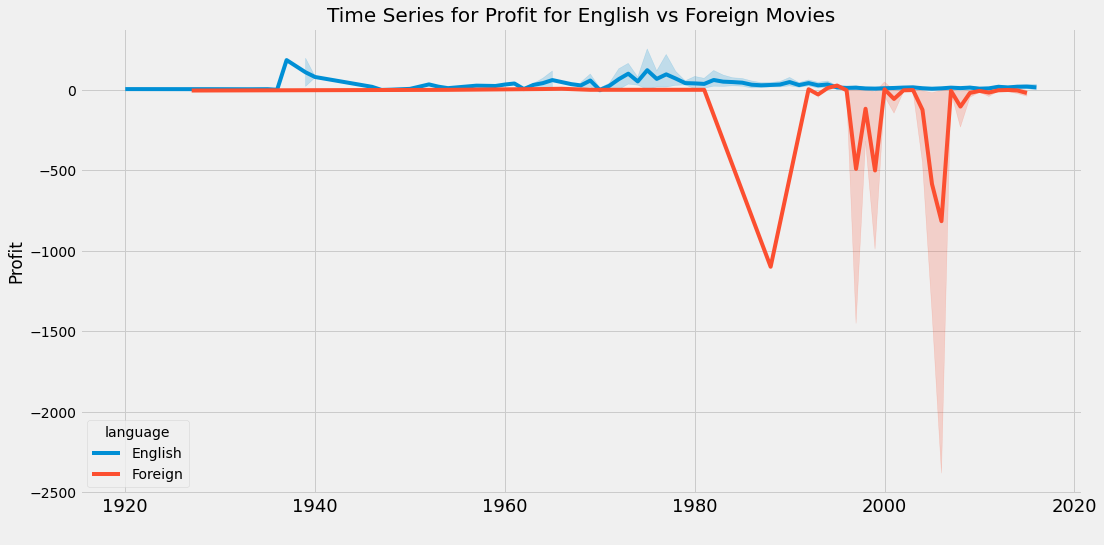

In [194]:
sns.lineplot(data['title_year'], data['Profit'], hue = data['language'])
plt.title('Time Series for Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

Foreign movies are facing loss throughout the time with highest loss in 1990.English movies are profitable throughout the time.

In [195]:
print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title',
                        'language','Profit']].style.background_gradient(cmap = 'Reds'))

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


All huge loss movies are from foreign category.

## Duration based gross and profit analysis

In [196]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'summer'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


In [197]:
display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'winter'))

,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


Text(0.5, 1.0, 'Gross Comparison')

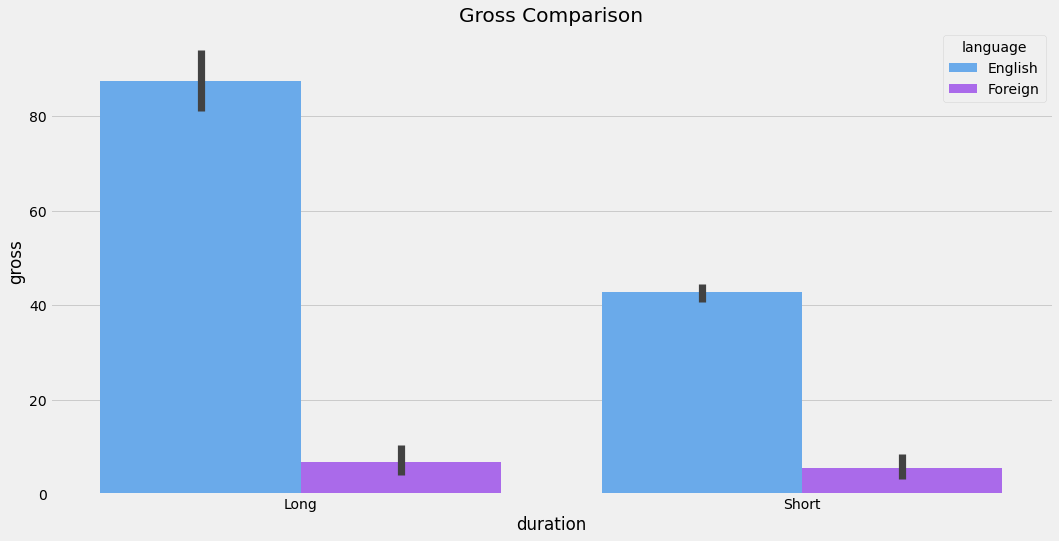

In [198]:
sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'cool')
plt.title('Gross Comparison')

## IMDB Score Analysis

In [199]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))


Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28


In [200]:
print("Top 5 Highest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(5))


Top 5 Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3
3466             The Godfather          9.2
66             The Dark Knight          9.0
2837    The Godfather: Part II          9.0
3355              Pulp Fiction          8.9


In [201]:
print("Top 5 Highest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(5))

Top 5 Highest Rated Short Duration Movie
                    movie_title  imdb_score
3592       The Usual Suspects          8.6
3175       American History X          8.6
4427             Modern Times          8.6
2152  Raiders of the Lost Ark          8.5
3931                  Samsara          8.5


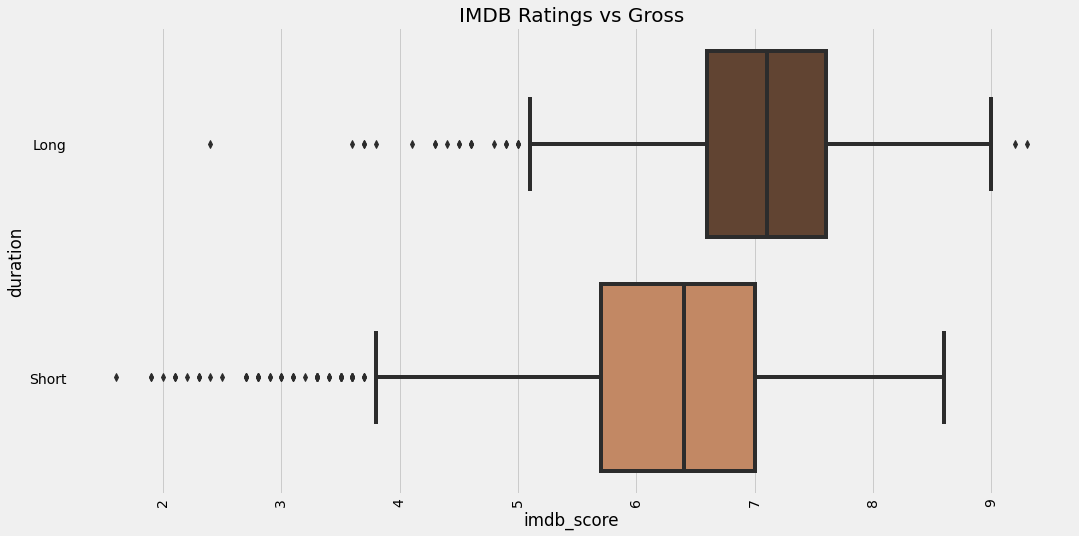

In [202]:
sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Long durtaion movies show high gross trend than short duration movies.

## Actor Performance Analysis

In [203]:
#get all movies information of an actor/actress

def actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
        'title_year',
        'genres',
       'language',
       'budget',
       'gross',
       'imdb_score'
        ]]
    return y

In [204]:
actors('Robert Downey Jr.')

,movie_title,title_year,genres,language,budget,gross,imdb_score
27,Captain America: Civil War,2016,Action|Adventure|Sci-Fi,English,250.0,407.197282,8.2
32,Iron Man 3,2013,Action|Adventure|Sci-Fi,English,200.0,408.992272,7.2
69,Iron Man,2008,Action|Adventure|Sci-Fi,English,140.0,318.298180,7.9
80,Iron Man 2,2010,Action|Adventure|Sci-Fi,English,200.0,312.057433,7.0
212,Sherlock Holmes: A Game of Shadows,2011,Action|Adventure|Crime|Mystery|Thriller,English,125.0,186.830669,7.5
363,Tropic Thunder,2008,Action|Comedy,English,92.0,110.416702,7.0
366,Sherlock Holmes,2009,Action|Adventure|Crime|Mystery|Thriller,English,90.0,209.019489,7.6
434,Zodiac,2007,Crime|Drama|History|Mystery|Thriller,English,65.0,33.048353,7.7
662,Due Date,2010,Comedy|Drama,English,65.0,100.448498,6.6
747,The Shaggy Dog,2006,Comedy|Family|Fantasy,English,50.0,61.112916,4.4


In [205]:
#create a report considering actor is first, 2nd and 3rd lead in a movie

def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())
    
actors_report('Robert Downey Jr.')

Time: 1995 2016
Max Gross : 623.28 Millions
Avg Gross : 126.40 Millions
Min Gross : 0.22 Millions
Number of 100 Million Movies : 10
Avg IMDB Score : 6.89
Most Common Genres:
 Comedy       9
Action       9
Drama        3
Biography    3
Crime        2
Name: Genre1, dtype: int64


In [206]:
print("Top 5 Highest Rated Movies of Leonardo DiCaprio\n", 
    data[data['actor_1_name'] == 'Leonardo DiCaprio'][['movie_title', 'gross', 'imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(5))

Top 5 Highest Rated Movies of Leonardo DiCaprio
                   movie_title       gross  imdb_score
97                 Inception   292.568851         8.8
361             The Departed   132.373442         8.5
296         Django Unchained   162.804648         8.5
308  The Wolf of Wall Street   116.866727         8.2
452           Shutter Island   127.968405         8.1


## Compare Actors Performance based on Critic Reviews

In [207]:
# Lets compare Brad Pitt, Tom Hanks and Keanu Reeves

def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Tom Hanks")
display(critically_acclaimed_actors('Tom Hanks'))

print("Number of Critics Reviews for Keanu Reeves")
display(critically_acclaimed_actors('Keanu Reeves'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Tom Hanks


6403

Number of Critics Reviews for Keanu Reeves


3273

In [208]:
pd.set_option('max_rows', 3000)

@interact
def show_movies_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][[ 'title_year','movie_title',
                                       'director_name',
                                       'actor_1_name',
                                       'actor_2_name',
                                       'actor_3_name',
                                       'Profit',
                                       'imdb_score',
                                    ]]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [209]:
pd.set_option('max_rows', 30000)

@interact
def show_articles_more_than(column=['budget', 'gross'], x=1000):
    return data.loc[data[column] > x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

## Recommending Movies based on Languages

In [210]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)


In [211]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


## Recommending Movies Based on Actors

In [212]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [213]:
recommend_movies_on_actors('Meryl Streep')

,movie_title,imdb_score
1295,Fantastic Mr. Fox,7.8
2386,Adaptation.,7.7
1925,The Hours,7.6
2206,Doubt,7.5
2086,The Bridges of Madison County,7.5
1941,August: Osage County,7.3
1575,Out of Africa,7.2
1204,Julie & Julia,7.0
1674,One True Thing,7.0
1408,The Devil Wears Prada,6.8


## Recommending Movies Based on Genres

TrusactionEncoder is an encoder class for transaction data in Python lists which can transform the genres data into a logical dataframe. Each column represents a genre and each row represent a record or a movie. True if the movies falls into a genre, False if not.

In [214]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [215]:
#convert the data into 0 and 1 to perform calculation
genres = x.astype('int')
genres.insert(0, 'movie_title', data['movie_title'])
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [216]:
# lets set these movie titles as index of the data
genres = genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [217]:
# making a recommendation engine for getting similar genres

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [218]:
recommendation_genres('Action')

Adventure    0.320532
Thriller     0.303708
Sci-Fi       0.295018
dtype: float64

In [219]:
recommendation_genres('Romance')

Comedy     0.180202
Drama      0.160206
Musical    0.070945
dtype: float64

## Recommending similar movies

In [220]:
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,Superman Returns,Quantum of Solace,Pirates of the Caribbean: Dead Man's Chest,The Lone Ranger,Man of Steel,The Chronicles of Narnia: Prince Caspian,The Avengers,Pirates of the Caribbean: On Stranger Tides,Men in Black 3,The Hobbit: The Battle of the Five Armies,The Amazing Spider-Man,Robin Hood,The Hobbit: The Desolation of Smaug,The Golden Compass,King Kong,Titanic,Captain America: Civil War,Battleship,Jurassic World,Skyfall,Spider-Man 2,Iron Man 3,Alice in Wonderland,X-Men: The Last Stand,Monsters University,Transformers: Revenge of the Fallen,Transformers: Age of Extinction,Oz the Great and Powerful,The Amazing Spider-Man 2,...,NaN,NaN,NaN,NaN,NaN,NaN,I Served the King of England,Soul Kitchen,Sling Blade,NaN,Hostel,Tristram Shandy: A Cock and Bull Story,Take Shelter,Lady in White,NaN,NaN,The Texas Chainsaw Massacre 2,NaN,Only God Forgives,NaN,NaN,NaN,NaN,NaN,The Names of Love,NaN,Savage Grace,NaN,Police Academy,NaN,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0


In [221]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(10)

In [222]:
recommendation_movie('The Avengers')

movie_title
Quantum of Solace                             1.0
The Flowers of War                            1.0
The Girl with the Dragon Tattoo               1.0
Lost in Space                                 1.0
Alvin and the Chipmunks: The Squeakquel       1.0
R.I.P.D.                                      1.0
Australia                                     1.0
The Hobbit: The Battle of the Five Armies     1.0
Edge of Darkness                              1.0
American Sniper                               1.0
dtype: float64

In [223]:
recommendation_movie('Avatar')

movie_title
Must Love Dogs                      1.0
Kung Pow: Enter the Fist            1.0
Center Stage                        1.0
Charlie's Angels: Full Throttle     1.0
Prometheus                          1.0
The Chronicles of Riddick           1.0
The Lone Ranger                     1.0
Romeo Must Die                      1.0
The Big Lebowski                    1.0
Daylight                            1.0
dtype: float64